# 🌍 Image Text Translation Tool

This notebook translates text within images while preserving the original image layout and background.

**Features:**
- Detects text in images using EasyOCR
- Translates text using Google Translate
- Intelligently removes original text using inpainting
- Places translated text in the same location with appropriate formatting

**Supported Languages:** Any language pair supported by Google Translate

## 📦 Step 1: Install Required Libraries

In [1]:
# Install required packages
!pip install easyocr googletrans==4.0.0rc1 opencv-python-headless Pillow numpy matplotlib

# Import libraries
import easyocr
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from googletrans import Translator
import matplotlib.pyplot as plt
import io
import requests
from google.colab import files
import os
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries installed successfully!")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━

## 🔧 Step 2: Initialize Tools

In [7]:
# Initialize EasyOCR reader (supports 80+ languages)
print("🔍 Initializing text detection...")
reader = easyocr.Reader(['ch_sim', 'en'])

# Initialize Google Translator
print("🌐 Initializing translator...")
translator = Translator()

print("✅ Tools initialized successfully!")

# Available language codes for translation
common_languages = {
    'en': 'English', 'es': 'Spanish', 'fr': 'French', 'de': 'German',
    'it': 'Italian', 'pt': 'Portuguese', 'ru': 'Russian', 'ja': 'Japanese',
    'ko': 'Korean', 'zh': 'Chinese', 'ar': 'Arabic', 'hi': 'Hindi',
    'th': 'Thai', 'vi': 'Vietnamese', 'nl': 'Dutch', 'sv': 'Swedish'
}

print("\n📋 Common language codes:")
for code, name in common_languages.items():
    print(f"  {code}: {name}")

🔍 Initializing text detection...


Progress: |██████████████████████████████████████████████████| 100.0% Complete🌐 Initializing translator...
✅ Tools initialized successfully!

📋 Common language codes:
  en: English
  es: Spanish
  fr: French
  de: German
  it: Italian
  pt: Portuguese
  ru: Russian
  ja: Japanese
  ko: Korean
  zh: Chinese
  ar: Arabic
  hi: Hindi
  th: Thai
  vi: Vietnamese
  nl: Dutch
  sv: Swedish


## 📸 Step 3: Load Your Image

Choose one of the following methods to load your image:

In [8]:
# Method 1: Upload from your computer
def upload_image():
    print("📁 Please select an image file to upload...")
    uploaded = files.upload()

    if uploaded:
        filename = list(uploaded.keys())[0]
        image = Image.open(filename)
        print(f"✅ Image '{filename}' uploaded successfully!")
        print(f"📏 Image size: {image.size}")
        return image, filename
    else:
        print("❌ No file uploaded")
        return None, None

# Method 2: Load from URL
def load_from_url(url):
    try:
        response = requests.get(url)
        image = Image.open(io.BytesIO(response.content))
        print(f"✅ Image loaded from URL successfully!")
        print(f"📏 Image size: {image.size}")
        return image, "url_image.jpg"
    except Exception as e:
        print(f"❌ Error loading image from URL: {e}")
        return None, None

# Choose your method:
print("Choose how to load your image:")
print("1. Upload from computer (run upload_image())")
print("2. Load from URL (run load_from_url('your_url_here'))")
print("\nExample URL: https://via.placeholder.com/400x200/0000FF/FFFFFF?text=Hello+World")

Choose how to load your image:
1. Upload from computer (run upload_image())
2. Load from URL (run load_from_url('your_url_here'))

Example URL: https://via.placeholder.com/400x200/0000FF/FFFFFF?text=Hello+World


📁 Please select an image file to upload...


Saving Sports-Research-Omega-3-Fish-Oil-Triple-Strength-180-Softgels-07-29-2025_05_32_PM.png to Sports-Research-Omega-3-Fish-Oil-Triple-Strength-180-Softgels-07-29-2025_05_32_PM (1).png
✅ Image 'Sports-Research-Omega-3-Fish-Oil-Triple-Strength-180-Softgels-07-29-2025_05_32_PM (1).png' uploaded successfully!
📏 Image size: (601, 599)


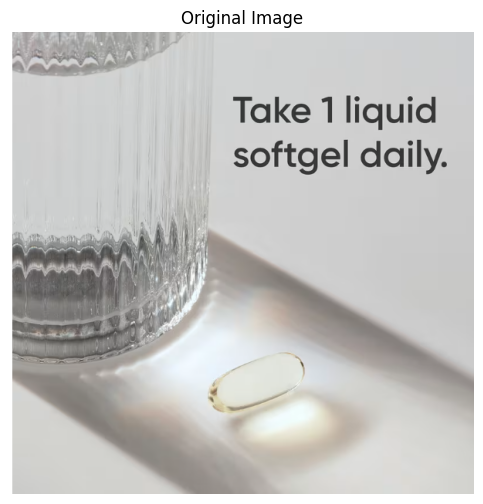

In [10]:
# Uncomment and run ONE of these lines:

# Option 1: Upload from computer
image, filename = upload_image()

# Option 2: Load from URL (uncomment and modify URL)
#image, filename = load_from_url("/content/Sports-Research-Omega-3-Fish-Oil-Triple-Strength-180-Softgels-07-29-2025_05_32_PM.png")

# Display the loaded image
if image:
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.title('Original Image')
    plt.show()
else:
    print("⚠️ Please load an image first!")

## 🔍 Step 4: Detect Text in Image

🔍 Detecting text in image...
📝 Found 2 text regions
  1. 'Take 1 liquid' (confidence: 0.70)
  2. 'softgel daily。' (confidence: 0.77)


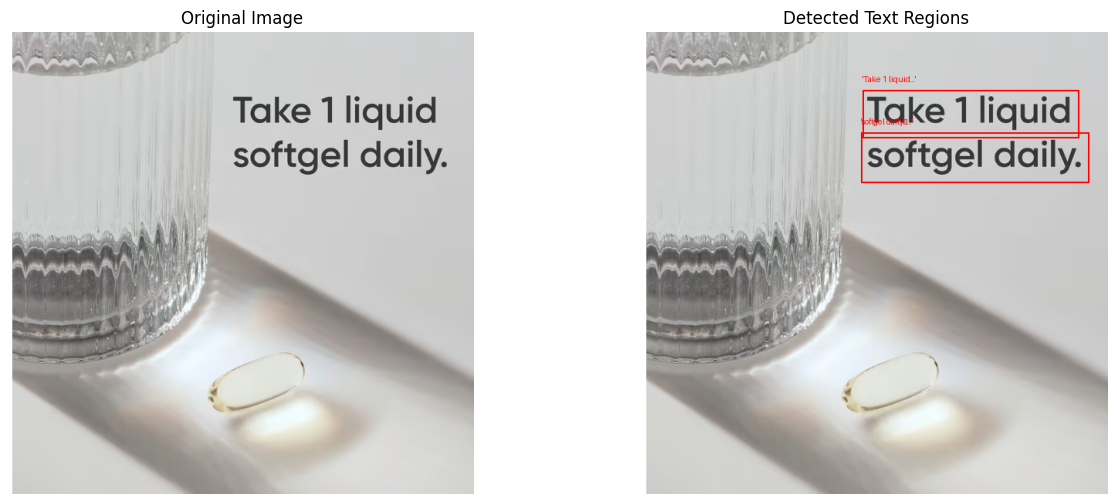

In [11]:
def detect_text(image):
    """Detect text in image using EasyOCR"""
    # Convert PIL image to numpy array
    img_array = np.array(image)

    # Detect text
    print("🔍 Detecting text in image...")
    results = reader.readtext(img_array)

    print(f"📝 Found {len(results)} text regions")

    # Display results
    for i, (bbox, text, confidence) in enumerate(results):
        print(f"  {i+1}. '{text}' (confidence: {confidence:.2f})")

    return results

def visualize_text_detection(image, results):
    """Visualize detected text regions"""
    img_with_boxes = image.copy()
    draw = ImageDraw.Draw(img_with_boxes)

    for bbox, text, confidence in results:
        # Convert bbox to rectangle coordinates
        points = np.array(bbox)
        min_x, min_y = points.min(axis=0)
        max_x, max_y = points.max(axis=0)

        # Draw bounding box
        draw.rectangle([min_x, min_y, max_x, max_y], outline='red', width=2)

        # Add text label
        draw.text((min_x, min_y-20), f"'{text[:15]}...'", fill='red')

    return img_with_boxes

# Run text detection
if image:
    text_results = detect_text(image)

    # Visualize detection results
    if text_results:
        detection_viz = visualize_text_detection(image, text_results)

        plt.figure(figsize=(15, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(detection_viz)
        plt.title('Detected Text Regions')
        plt.axis('off')
        plt.show()
    else:
        print("❌ No text detected in the image")
else:
    print("⚠️ Please load an image first!")

## 🌐 Step 5: Configure Translation

In [17]:
# Set your target language here
TARGET_LANGUAGE = 'es'  # Change this to your desired language code

def translate_text(text, target_lang='es'):
    """Translate text using Google Translate"""
    try:
        result = translator.translate(text, dest=target_lang)
        return result.text
    except Exception as e:
        print(f"Translation error for '{text}': {e}")
        return text  # Return original if translation fails

# Test translation with detected text
if 'text_results' in locals() and text_results:
    print(f"🌐 Translating text to {common_languages.get(TARGET_LANGUAGE, TARGET_LANGUAGE)}:")
    print("-" * 50)

    translated_results = []
    for bbox, text, confidence in text_results:
        translated = translate_text(text, TARGET_LANGUAGE)
        translated_results.append((bbox, text, translated, confidence))
        print(f"Original:   '{text}'")
        print(f"Translated: '{translated}'")
        print()

    print("✅ Translation complete!")
else:
    print("⚠️ Please detect text first!")

🌐 Translating text to Spanish:
--------------------------------------------------
Original:   'Take 1 liquid'
Translated: 'Tomar 1 líquido'

Original:   'softgel daily。'
Translated: 'Softgel diario。'

✅ Translation complete!


## 🎨 Step 6: Remove Original Text (Inpainting)

🎨 Removing original text...
✅ Text removal complete!


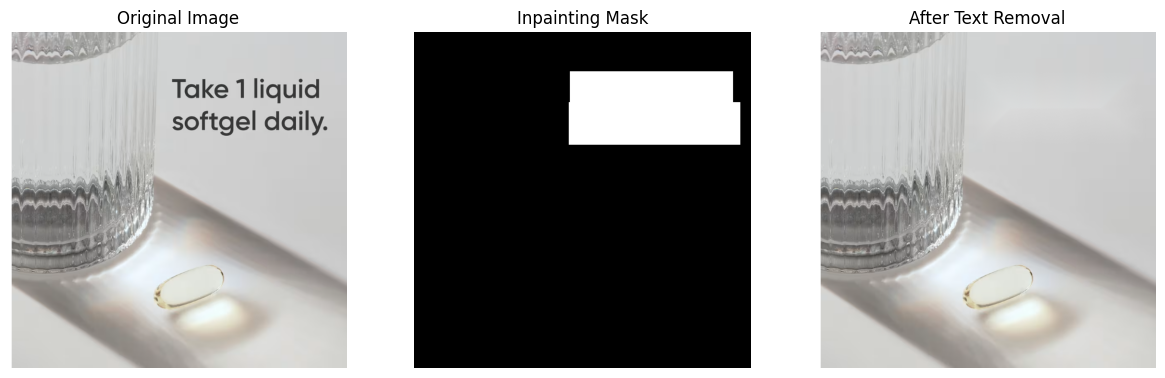

In [18]:
def create_inpaint_mask(image, text_regions, padding=5):
    """Create a mask for text regions to be inpainted"""
    mask = Image.new('L', image.size, 0)  # Black mask
    mask_draw = ImageDraw.Draw(mask)

    for bbox, _, _, _ in text_regions:
        # Convert bbox to rectangle with padding
        points = np.array(bbox)
        min_x, min_y = points.min(axis=0)
        max_x, max_y = points.max(axis=0)

        # Add padding
        min_x = max(0, min_x - padding)
        min_y = max(0, min_y - padding)
        max_x = min(image.width, max_x + padding)
        max_y = min(image.height, max_y + padding)

        # Fill the text region in white (area to inpaint)
        mask_draw.rectangle([min_x, min_y, max_x, max_y], fill=255)

    return mask

def simple_inpaint(image, mask):
    """Simple inpainting using OpenCV"""
    # Convert to OpenCV format
    img_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    mask_cv = np.array(mask)

    # Apply inpainting
    inpainted = cv2.inpaint(img_cv, mask_cv, 3, cv2.INPAINT_TELEA)

    # Convert back to PIL
    inpainted_pil = Image.fromarray(cv2.cvtColor(inpainted, cv2.COLOR_BGR2RGB))

    return inpainted_pil

# Perform inpainting
if 'translated_results' in locals() and translated_results:
    print("🎨 Removing original text...")

    # Create mask for text regions
    mask = create_inpaint_mask(image, translated_results)

    # Perform inpainting
    inpainted_image = simple_inpaint(image, mask)

    # Show results
    plt.figure(figsize=(20, 6))

    plt.subplot(1, 4, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Inpainting Mask')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(inpainted_image)
    plt.title('After Text Removal')
    plt.axis('off')

    print("✅ Text removal complete!")
else:
    print("⚠️ Please complete translation first!")

## ✍️ Step 7: Add Translated Text

✍️ Adding translated text...
🎯 Processing: 'Take 1 liquid' → 'Tomar 1 líquido'
📏 Calculated font size: 44
✅ Loaded font: /usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf
📍 Text position: (261, 84)
✅ Added text: 'Tomar 1 líquido' at (261, 84)
🎯 Processing: 'softgel daily。' → 'Softgel diario。'
📏 Calculated font size: 46
✅ Loaded font: /usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf
📍 Text position: (273, 141)
✅ Added text: 'Softgel diario。' at (273, 141)


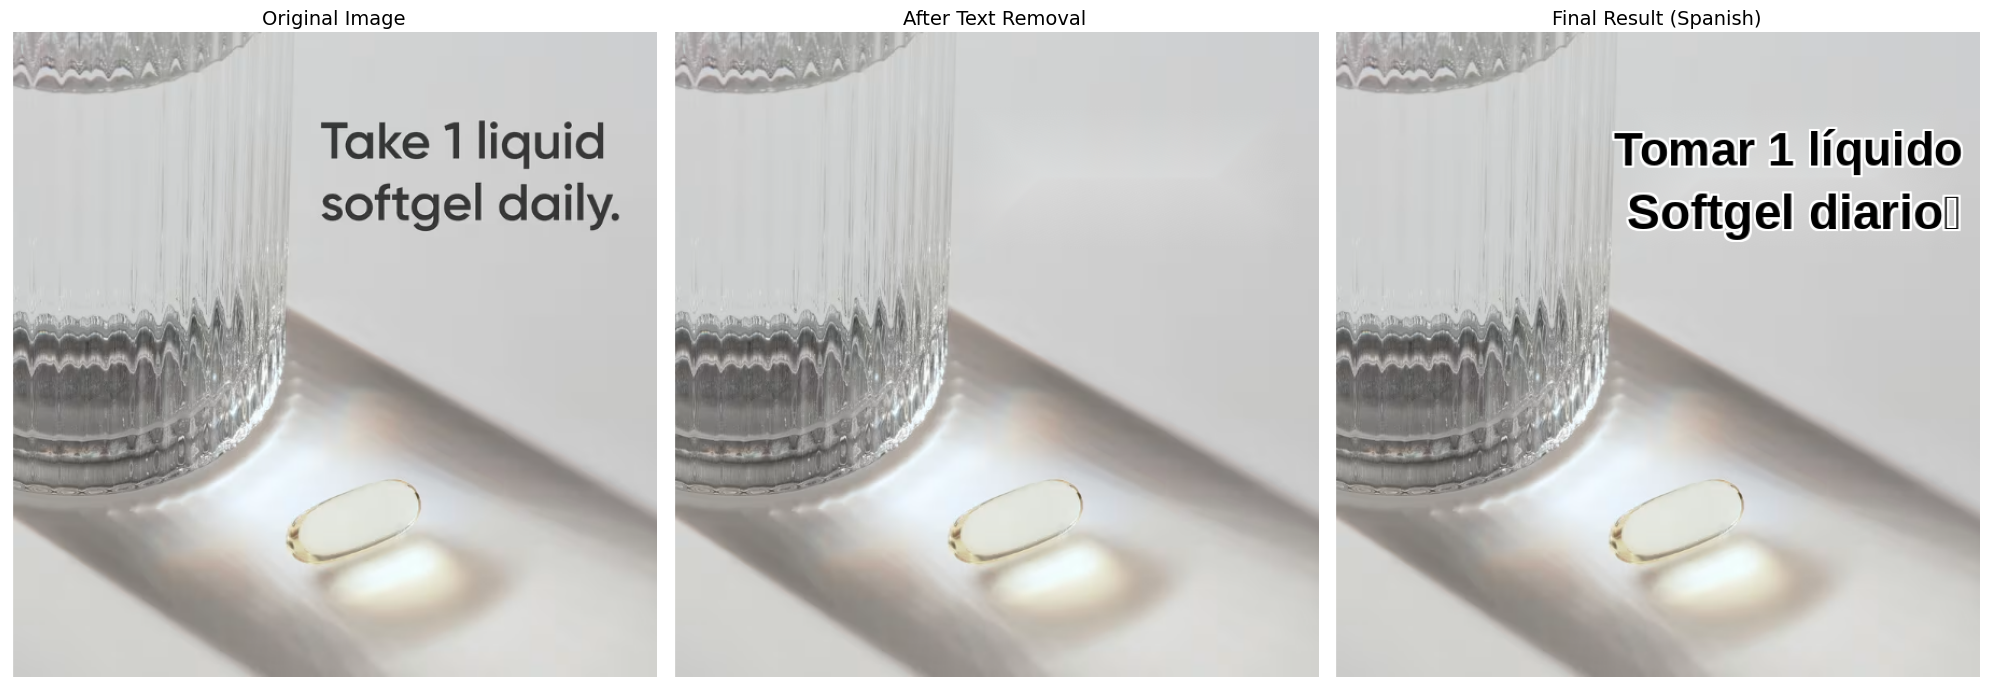

✅ Translation complete!


In [20]:
def estimate_font_size(bbox, text, image_size):
    """Estimate appropriate font size based on bounding box dimensions"""
    points = np.array(bbox)
    width = points[:, 0].max() - points[:, 0].min()
    height = points[:, 1].max() - points[:, 1].min()

    # Use height as primary size indicator (more reliable for text)
    base_size = height * 0.8  # Text typically fills 80% of bbox height

    # Adjust for very long or very short text
    text_length = len(text) if len(text) > 0 else 1

    # Don't shrink too much for longer text - just slightly
    length_adjustment = max(0.7, 1.0 - (text_length - 10) * 0.02) if text_length > 10 else 1.0

    font_size = int(base_size * length_adjustment)

    # Reasonable bounds
    return max(8, min(font_size, 200))

def get_text_position(bbox, text_width, text_height):
    """Calculate optimal text position within bounding box"""
    points = np.array(bbox)

    # Get bounding box dimensions
    min_x, max_x = points[:, 0].min(), points[:, 0].max()
    min_y, max_y = points[:, 1].min(), points[:, 1].max()

    # Center the text within the bounding box
    center_x = (min_x + max_x) / 2
    center_y = (min_y + max_y) / 2

    # Position text so it's centered
    text_x = center_x - text_width / 2
    text_y = center_y - text_height / 2

    return int(text_x), int(text_y)

def add_translated_text(image, translated_results):
    """Add translated text to the image with proper sizing and positioning"""
    result_image = image.copy()
    draw = ImageDraw.Draw(result_image)

    for bbox, original, translated, confidence in translated_results:
        print(f"🎯 Processing: '{original}' → '{translated}'")

        # Estimate appropriate font size
        font_size = estimate_font_size(bbox, translated, image.size)
        print(f"📏 Calculated font size: {font_size}")

        # Try to load fonts in order of preference
        font = None
        font_paths = [
            "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf",
            "/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf",
            "/System/Library/Fonts/Helvetica.ttc",  # macOS
            "arial.ttf",  # Windows
            "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf",  # Fallback
        ]

        for font_path in font_paths:
            try:
                font = ImageFont.truetype(font_path, font_size)
                print(f"✅ Loaded font: {font_path}")
                break
            except:
                continue

        # Final fallback to default
        if font is None:
            try:
                font = ImageFont.load_default()
                print("⚠️ Using default font")
            except:
                print("❌ No font available, skipping text")
                continue

        # Get accurate text dimensions
        bbox_text = draw.textbbox((0, 0), translated, font=font)
        text_width = bbox_text[2] - bbox_text[0]
        text_height = bbox_text[3] - bbox_text[1]

        # Calculate position
        text_x, text_y = get_text_position(bbox, text_width, text_height)
        print(f"📍 Text position: ({text_x}, {text_y})")

        # Determine text color based on background
        # Sample the background color at text location
        points = np.array(bbox)
        sample_x = int(points[:, 0].mean())
        sample_y = int(points[:, 1].mean())

        # Get pixel color at center of bbox
        try:
            pixel = result_image.getpixel((sample_x, sample_y))
            if isinstance(pixel, tuple):
                brightness = sum(pixel[:3]) / 3 if len(pixel) >= 3 else pixel[0]
            else:
                brightness = pixel

            # Choose contrasting color
            text_color = 'black' if brightness > 127 else 'white'
            outline_color = 'white' if brightness > 127 else 'black'
        except:
            # Default colors
            text_color = 'black'
            outline_color = 'white'

        # Add text with outline for better visibility
        outline_width = max(1, font_size // 20)  # Scale outline with font size

        # Draw text outline
        for adj_x in range(-outline_width, outline_width + 1):
            for adj_y in range(-outline_width, outline_width + 1):
                if adj_x != 0 or adj_y != 0:
                    draw.text((text_x + adj_x, text_y + adj_y), translated,
                             font=font, fill=outline_color)

        # Draw main text
        draw.text((text_x, text_y), translated, font=font, fill=text_color)

        print(f"✅ Added text: '{translated}' at ({text_x}, {text_y})")

    return result_image

# Main execution with better error handling
if 'inpainted_image' in locals() and 'translated_results' in locals():
    print("✍️ Adding translated text...")

    try:
        final_image = add_translated_text(inpainted_image, translated_results)

        # Show final result
        plt.figure(figsize=(20, 8))

        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title('Original Image', fontsize=14)
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(inpainted_image)
        plt.title('After Text Removal', fontsize=14)
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(final_image)
        plt.title(f'Final Result ({common_languages.get(TARGET_LANGUAGE, TARGET_LANGUAGE)})', fontsize=14)
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        print("✅ Translation complete!")

    except Exception as e:
        print(f"❌ Error adding translated text: {e}")
        import traceback
        traceback.print_exc()

else:
    print("⚠️ Please complete text detection and inpainting first!")
    if 'inpainted_image' not in locals():
        print("   Missing: inpainted_image")
    if 'translated_results' not in locals():
        print("   Missing: translated_results")

In [23]:
import json
import xml.etree.ElementTree as ET
from pathlib import Path
import base64
from io import BytesIO
import time

def save_for_designers(image, translated_results, output_dir="designer_exports"):
    """Save translation project in multiple designer-friendly formats"""

    Path(output_dir).mkdir(exist_ok=True)
    project_name = f"translation_project_{int(time.time())}"

    # 1. JSON Format - Most Flexible
    save_as_json(image, translated_results, output_dir, project_name)

    # 2. SVG Format - Vector Graphics
    save_as_svg(image, translated_results, output_dir, project_name)

    # 3. PSD-like layered structure (if pillow-heif available)
    save_layered_format(image, translated_results, output_dir, project_name)

    # 4. Figma/Sketch compatible JSON
    save_figma_format(image, translated_results, output_dir, project_name)

    print(f"✅ Designer files saved to: {output_dir}/")
    return output_dir

def save_as_json(image, translated_results, output_dir, project_name):
    """Save as editable JSON with all text properties"""

    # Convert image to base64 for embedding
    buffered = BytesIO()
    image.save(buffered, format="PNG")
    img_base64 = base64.b64encode(buffered.getvalue()).decode()

    project_data = {
        "project_info": {
            "name": project_name,
            "created": time.strftime("%Y-%m-%d %H:%M:%S"),
            "image_dimensions": {
                "width": image.size[0],
                "height": image.size[1]
            },
            "format_version": "1.0"
        },
        "background_image": {
            "data": img_base64,
            "format": "PNG"
        },
        "text_elements": []
    }

    for i, (bbox, original, translated, confidence) in enumerate(translated_results):
        points = np.array(bbox)

        text_element = {
            "id": f"text_{i}",
            "original_text": original,
            "translated_text": translated,
            "confidence": float(confidence),
            "position": {
                "bounding_box": {
                    "x_min": float(points[:, 0].min()),
                    "y_min": float(points[:, 1].min()),
                    "x_max": float(points[:, 0].max()),
                    "y_max": float(points[:, 1].max()),
                    "center_x": float(points[:, 0].mean()),
                    "center_y": float(points[:, 1].mean())
                },
                "coordinates": [ [float(p[0]), float(p[1])] for p in bbox]
            },
            "styling": {
                "font_size": estimate_font_size(bbox, translated, image.size),
                "font_family": "DejaVu Sans Bold",
                "font_weight": "bold",
                "color": "auto",  # Will be calculated based on background
                "outline_width": 2,
                "outline_color": "auto",
                "alignment": "center"
            },
            "editable": True,
            "visible": True
        }

        project_data["text_elements"].append(text_element)

    # Save JSON file
    json_path = f"{output_dir}/{project_name}.json"
    with open(json_path, 'w', encoding='utf-8') as f:
        json.dump(project_data, f, indent=2, ensure_ascii=False)

    print(f"📄 JSON project saved: {json_path}")
    return json_path

def save_as_svg(image, translated_results, output_dir, project_name):
    """Save as SVG for vector editing in Illustrator/Inkscape"""

    width, height = image.size

    # Create SVG content
    svg_content = f'''<?xml version="1.0" encoding="UTF-8"?>
<svg width="{width}" height="{height}" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
    <defs>
        <!-- Define reusable styles -->
        <style>
            .editable-text {{
                font-family: 'Arial', sans-serif;
                font-weight: bold;
                text-anchor: middle;
                dominant-baseline: central;
            }}
        </style>
    </defs>

    <!-- Background Image -->
    <image x="0" y="0" width="{width}" height="{height}" xlink:href="data:image/png;base64,{get_image_base64(image)}" />

    <!-- Text Elements (Editable) -->'''

    for i, (bbox, original, translated, confidence) in enumerate(translated_results):
        points = np.array(bbox)
        center_x = points[:, 0].mean()
        center_y = points[:, 1].mean()
        font_size = estimate_font_size(bbox, translated, image.size)

        svg_content += f'''
    <text id="text_{i}" class="editable-text"
          x="{center_x}" y="{center_y}"
          font-size="{font_size}px"
          fill="black"
          stroke="white"
          stroke-width="2"
          data-original="{original}"
          data-confidence="{confidence}">
        {translated}
    </text>'''

    svg_content += '''
</svg>'''

    # Save SVG file
    svg_path = f"{output_dir}/{project_name}.svg"
    with open(svg_path, 'w', encoding='utf-8') as f:
        f.write(svg_content)

    print(f"🎨 SVG file saved: {svg_path}")
    return svg_path

def save_figma_format(image, translated_results, output_dir, project_name):
    """Save in Figma/Sketch compatible format"""

    figma_data = {
        "name": project_name,
        "type": "FRAME",
        "width": image.size[0],
        "height": image.size[1],
        "children": []
    }

    # Add background
    figma_data["children"].append({
        "name": "Background",
        "type": "RECTANGLE",
        "width": image.size[0],
        "height": image.size[1],
        "x": 0,
        "y": 0,
        "fills": [{
            "type": "IMAGE",
            "imageData": get_image_base64(image)
        }]
    })

    # Add text elements
    for i, (bbox, original, translated, confidence) in enumerate(translated_results):
        points = np.array(bbox)

        text_node = {
            "name": f"Text_{i}_{translated[:20]}",
            "type": "TEXT",
            "characters": translated,
            "x": float(points[:, 0].min()),
            "y": float(points[:, 1].min()),
            "width": float(points[:, 0].max() - points[:, 0].min()),
            "height": float(points[:, 1].max() - points[:, 1].min()),
            "fontSize": estimate_font_size(bbox, translated, image.size),
            "fontFamily": "Inter",
            "fontWeight": 700,
            "textAlignHorizontal": "CENTER",
            "textAlignVertical": "CENTER",
            "fills": [{"type": "SOLID", "color": {"r": 0, "g": 0, "b": 0}}],
            "strokes": [{"type": "SOLID", "color": {"r": 1, "g": 1, "b": 1}}],
            "strokeWeight": 2,
            "metadata": {
                "original_text": original,
                "confidence": confidence,
                "editable": True
            }
        }

        figma_data["children"].append(text_node)

    # Save Figma JSON
    figma_path = f"{output_dir}/{project_name}_figma.json"
    with open(figma_path, 'w', encoding='utf-8') as f:
        json.dump(figma_data, f, indent=2, ensure_ascii=False)

    print(f"🎯 Figma format saved: {figma_path}")
    return figma_path

def save_layered_format(image, translated_results, output_dir, project_name):
    """Save as layered format (separate text and background)"""

    # Save clean background (inpainted image)
    bg_path = f"{output_dir}/{project_name}_background.png"
    image.save(bg_path)

    # Create text-only layers
    for i, (bbox, original, translated, confidence) in enumerate(translated_results):
        # Create transparent image with just this text
        text_layer = Image.new('RGBA', image.size, (0, 0, 0, 0))
        draw = ImageDraw.Draw(text_layer)

        # Add the text with same positioning logic
        points = np.array(bbox)
        center_x = points[:, 0].mean()
        center_y = points[:, 1].mean()
        font_size = estimate_font_size(bbox, translated, image.size)

        try:
            font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", font_size)
        except:
            font = ImageFont.load_default()

        bbox_text = draw.textbbox((0, 0), translated, font=font)
        text_width = bbox_text[2] - bbox_text[0]
        text_height = bbox_text[3] - bbox_text[1]

        text_x = center_x - text_width // 2
        text_y = center_y - text_height // 2

        # Draw with outline
        for adj_x in range(-2, 3):
            for adj_y in range(-2, 3):
                if adj_x != 0 or adj_y != 0:
                    draw.text((text_x + adj_x, text_y + adj_y), translated,
                             font=font, fill=(255, 255, 255, 255))

        draw.text((text_x, text_y), translated, font=font, fill=(0, 0, 0, 255))

        # Save individual text layer
        layer_path = f"{output_dir}/{project_name}_text_{i}_{translated[:10]}.png"
        text_layer.save(layer_path)

    print(f"🔤 Text layers saved to: {output_dir}/")

def get_image_base64(image):
    """Convert PIL image to base64 string"""
    buffered = BytesIO()
    image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode()

def load_designer_project(json_path):
    """Load and apply designer modifications"""
    with open(json_path, 'r', encoding='utf-8') as f:
        project_data = json.load(f)

    print(f"📂 Loaded project: {project_data['project_info']['name']}")

    # Decode background image
    img_data = base64.b64decode(project_data['background_image']['data'])
    background = Image.open(BytesIO(img_data))

    # Apply modified text elements
    result_image = background.copy()
    draw = ImageDraw.Draw(result_image)

    for text_elem in project_data['text_elements']:
        if not text_elem.get('visible', True):
            continue

        # Get modified properties
        text = text_elem['translated_text']
        pos = text_elem['position']['bounding_box']
        style = text_elem['styling']

        # Apply styling
        font_size = style.get('font_size', 20)
        try:
            font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", font_size)
        except:
            font = ImageFont.load_default()

        # Calculate position
        center_x = pos['center_x']
        center_y = pos['center_y']

        bbox_text = draw.textbbox((0, 0), text, font=font)
        text_width = bbox_text[2] - bbox_text[0]
        text_height = bbox_text[3] - bbox_text[1]

        text_x = center_x - text_width // 2
        text_y = center_y - text_height // 2

        # Draw text
        outline_width = style.get('outline_width', 2)

        # Outline
        for adj_x in range(-outline_width, outline_width + 1):
            for adj_y in range(-outline_width, outline_width + 1):
                if adj_x != 0 or adj_y != 0:
                    draw.text((text_x + adj_x, text_y + adj_y), text,
                             font=font, fill='white')

        # Main text
        draw.text((text_x, text_y), text, font=font, fill='black')

    return result_image

# Usage example
if 'inpainted_image' in locals() and 'translated_results' in locals():
    print("💾 Saving for designers...")

    # Save in multiple formats
    output_dir = save_for_designers(inpainted_image, translated_results)

    print(f"""
    📁 Designer files created:

    1. 📄 JSON Project ({project_name}.json)
       - Fully editable text properties
       - Position, font, size, color adjustments
       - Load back with: load_designer_project()

    2. 🎨 SVG Vector ({project_name}.svg)
       - Edit in Illustrator, Inkscape
       - Vector text for perfect scaling
       - Preserves text editability

    3. 🎯 Figma Format ({project_name}_figma.json)
       - Import into Figma/Sketch
       - Design system integration
       - Collaborative editing

    4. 🔤 Layered PNGs ({project_name}_text_*.png)
       - Separate text layers
       - Photoshop workflow
       - Individual text control
    """)
else:
    print("⚠️ Complete translation first!")

# Example: Load modified project
# modified_result = load_designer_project("designer_exports/translation_project_123456.json")

💾 Saving for designers...
📄 JSON project saved: designer_exports/translation_project_1753837705.json
🎨 SVG file saved: designer_exports/translation_project_1753837705.svg
🔤 Text layers saved to: designer_exports/
🎯 Figma format saved: designer_exports/translation_project_1753837705_figma.json
✅ Designer files saved to: designer_exports/


NameError: name 'project_name' is not defined

## 💾 Step 8: Save Your Result

In [ ]:
# Save the final translated image
if 'final_image' in locals():
    # Save to file
    output_filename = f"translated_{TARGET_LANGUAGE}_{filename}"
    final_image.save(output_filename)

    print(f"💾 Final image saved as: {output_filename}")

    # Download the file
    files.download(output_filename)

    # Show summary
    print("\n📊 Translation Summary:")
    print("-" * 50)
    for bbox, original, translated, confidence in translated_results:
        print(f"'{original}' → '{translated}'")

    print(f"\n🎉 Successfully translated {len(translated_results)} text regions!")
else:
    print("⚠️ No final image to save. Please complete all previous steps.")

## 🚀 Step 9: Complete Translation Function

Here's a complete function that combines all steps for easy reuse:

In [ ]:
def translate_image_complete(image_input, target_language='es', show_steps=True):
    """
    Complete image translation function

    Args:
        image_input: PIL Image or file path
        target_language: Target language code (e.g., 'es', 'fr', 'de')
        show_steps: Whether to display intermediate steps

    Returns:
        final_image: PIL Image with translated text
        translation_log: List of (original, translated) text pairs
    """

    try:
        # Load image if it's a file path
        if isinstance(image_input, str):
            image = Image.open(image_input)
        else:
            image = image_input

        print(f"🔍 Step 1: Detecting text...")
        # Detect text
        img_array = np.array(image)
        results = reader.readtext(img_array)

        if not results:
            print("❌ No text detected in image")
            return image, []

        print(f"📝 Found {len(results)} text regions")

        print(f"🌐 Step 2: Translating to {common_languages.get(target_language, target_language)}...")
        # Translate text
        translated_results = []
        translation_log = []

        for bbox, text, confidence in results:
            translated = translate_text(text, target_language)
            translated_results.append((bbox, text, translated, confidence))
            translation_log.append((text, translated))

            if show_steps:
                print(f"  '{text}' → '{translated}'")

        print("🎨 Step 3: Removing original text...")
        # Create mask and inpaint
        mask = create_inpaint_mask(image, translated_results)
        inpainted_image = simple_inpaint(image, mask)

        print("✍️ Step 4: Adding translated text...")
        # Add translated text
        final_image = add_translated_text(inpainted_image, translated_results)

        print("✅ Translation complete!")

        if show_steps:
            # Display results
            plt.figure(figsize=(15, 5))

            plt.subplot(1, 3, 1)
            plt.imshow(image)
            plt.title('Original')
            plt.axis('off')

            plt.subplot(1, 3, 2)
            plt.imshow(inpainted_image)
            plt.title('Text Removed')
            plt.axis('off')

            plt.subplot(1, 3, 3)
            plt.imshow(final_image)
            plt.title('Translated')
            plt.axis('off')

            plt.tight_layout()
            plt.show()

        return final_image, translation_log

    except Exception as e:
        print(f"❌ Error during translation: {e}")
        return None, []

print("🚀 Complete translation function ready!")
print("\nUsage example:")
print("final_img, log = translate_image_complete(your_image, 'es')")

## 🔄 Bonus: Batch Processing Multiple Images

In [ ]:
def batch_translate_images(target_language='es'):
    """
    Translate multiple uploaded images
    """
    print("📁 Upload multiple images for batch translation...")
    uploaded_files = files.upload()

    if not uploaded_files:
        print("❌ No files uploaded")
        return

    results = []

    for filename in uploaded_files.keys():
        print(f"\n🔄 Processing {filename}...")
        try:
            image = Image.open(filename)
            final_image, translation_log = translate_image_complete(
                image, target_language, show_steps=False
            )

            if final_image:
                output_name = f"translated_{target_language}_{filename}"
                final_image.save(output_name)
                results.append((filename, output_name, translation_log))
                print(f"✅ Saved as {output_name}")

        except Exception as e:
            print(f"❌ Error processing {filename}: {e}")

    # Download all results
    print(f"\n💾 Downloading {len(results)} translated images...")
    for original, translated, log in results:
        files.download(translated)

    # Summary
    print(f"\n🎉 Batch translation complete! Processed {len(results)} images.")
    return results

print("🔄 Batch processing function ready!")
print("\nTo use: batch_translate_images('your_target_language')")

## 🛠️ Troubleshooting & Tips

### Common Issues:

1. **No text detected**:
   - Ensure image has clear, readable text
   - Try increasing image resolution
   - Check if text language is supported

2. **Poor translation quality**:
   - Original text might be unclear or corrupted
   - Try manual correction in the translation step

3. **Text positioning issues**:
   - Adjust the `padding` parameter in `create_inpaint_mask()`
   - Modify font size estimation in `estimate_font_size()`

4. **Inpainting artifacts**:
   - Simple inpainting works best on uniform backgrounds
   - For complex backgrounds, consider manual editing

### Supported Languages:
- **Detection**: 80+ languages via EasyOCR
- **Translation**: 100+ languages via Google Translate

### Performance Tips:
- Resize large images (>2048px) for faster processing
- Use high-contrast images for better text detection
- Process images with uniform backgrounds for better inpainting

### Customization:
- Modify `TARGET_LANGUAGE` for different output languages
- Adjust font selection in `add_translated_text()`
- Customize text styling (color, outline, etc.)
